In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
def hmc_trace(U, gradU, m, dt, resample=False, nstep=300, niter=50, x0=1, p0=0):
    '''
    trace of hmc
    '''
    x = x0
    p = p0
    xs = np.zeros(nstep)
    ps = np.zeros(nstep)
    
    for i in range(nstep):
        if resample:
            p = np.random.randn(1) * np.sqrt(m)
        for j in range(niter):
            p = p - dt * gradU(x) / 2
            x = x + p * dt / m
            p = p - dt * gradU(x) / 2
        xs[i] = x
        ps[i] = p
    
    return (xs, ps)

In [3]:
def sghmc(U, gradU, m, dt, C, nstep=300, niter=50, x0=1, p0=0):
    '''
    add friction
    '''
    Bhat =  0.5 * 4 * dt
    D = np.sqrt(2 * (C-Bhat) * dt)
    x = x0
    p = p0
    xs = np.zeros(nstep)
    ps = np.zeros(nstep)
    
    for i in range(nstep):
        for j in range(niter):
            p = p - gradU(x) * dt  - p * C * dt / m  + np.random.randn(1) * D
            x = x + p * dt / m
        xs[i] = x
        ps[i] = p
    
    return (xs, ps)

In [4]:
U = lambda x: 0.5 * x**2
gradUPerfect = lambda x: x
gradU = lambda x: x + 2*np.random.randn(1)
m = 1
C = 3
dt = 0.1
nstep = 300
niter = 50
x0 = 1
p0 = 0

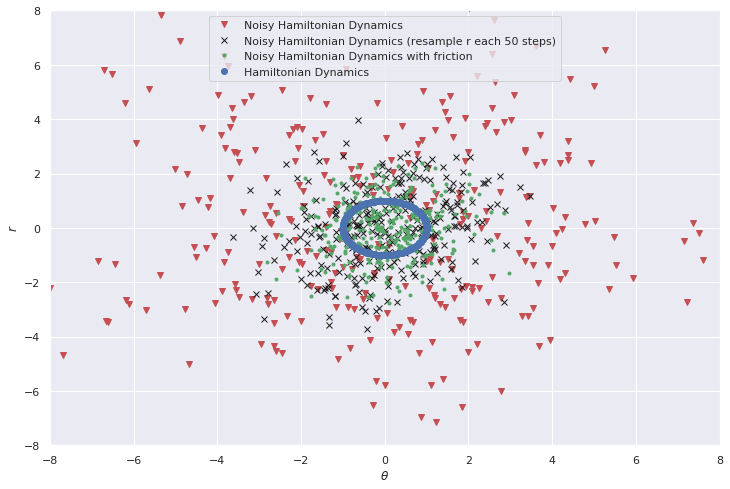

In [5]:
np.random.seed(663)


xs_1, ps_1 = hmc_trace(U, gradU, m, dt)
xs_2, ps_2 = hmc_trace(U, gradU, m, dt, resample=True)
xs_3, ps_3 = sghmc(U, gradU, m, dt, C)
xs_4, ps_4 = hmc_trace(U, gradUPerfect, m, dt)

plt.figure(figsize=(12,8))

p1 = plt.plot(xs_1, ps_1, 'rv', 3)
p2 = plt.plot(xs_2, ps_2, 'kx', 3)
p3 = plt.plot(xs_3, ps_3, 'g.', 3)
p4 = plt.plot(xs_4, ps_4, 'bo', 4)

plt.legend(loc = 9,
           handles=(p1[0],p2[0],p3[0],p4[0]),
           labels=('Noisy Hamiltonian Dynamics',
                   'Noisy Hamiltonian Dynamics (resample r each 50 steps)',
                   'Noisy Hamiltonian Dynamics with friction',
                   'Hamiltonian Dynamics')
          )
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.xlabel('$\\theta$')
plt.ylabel('$r$');